In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.font_manager as fm
import matplotlib
import timeit
import feather
import statsmodels as stm
import autotime
%matplotlib inline
%load_ext autotime
import seaborn as sns
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression as LinR
from sklearn.svm import SVR
from sklearn.cross_validation import train_test_split

C:\CS\Anaconda\envs\DublinBus\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [39]:
res = pd.read_csv('Route_XXXX_travel_time_csvs/Route_016C_travel_time.csv')
route_list_SSID13481349 = ['0016', '0068', '0122', '0009', '068A']
for r in route_list_SSID13481349:
    df = pd.read_csv('Route_XXXX_travel_time_csvs/Route_%s_travel_time.csv' % r)
    res = pd.concat([df, res], axis=0) 
res

,Day,DestStopID,HourFrame,JourneyPatternID,Rain,SSID,SchoolHoliday,SourceStopID,TimeFrame,TravelTime,VehicleJourneyID,WindSpeed
0,Tuesday,1278,8,068A0001,0.0,44951278,False,4495,2012-11-06,18,1909,15.0
1,Tuesday,1282,8,068A0001,0.0,12781282,False,1278,2012-11-06,19,1909,15.0
2,Tuesday,4456,8,068A0001,0.0,12824456,False,1282,2012-11-06,41,1909,15.0
3,Tuesday,1284,8,068A0001,0.0,44561284,False,4456,2012-11-06,62,1909,15.0
4,Tuesday,1285,8,068A0001,0.0,12841285,False,1284,2012-11-06,297,1909,15.0
5,Tuesday,1286,8,068A0001,0.0,12851286,False,1285,2012-11-06,181,1909,15.0
6,Tuesday,1288,8,068A0001,0.0,12861288,False,1286,2012-11-06,72,1909,15.0
7,Tuesday,1289,8,068A0001,0.0,12881289,False,1288,2012-11-06,37,1909,15.0
8,Tuesday,1360,9,068A0001,0.0,12891360,False,1289,2012-11-06,114,1909,15.5
9,Tuesday,1362,9,068A0001,0.0,13601362,False,1360,2012-11-06,39,1909,15.5


time: 2.25 s


Description:  This segment is on South Circular Road, going into the city centre, just past Leonards' Corner.

In [40]:
#check unique values of each feature

print("Feature, UniqueValues") 
for column in res:
    print(column + "\t" + str(len(res[column].unique())))

Feature, UniqueValues
Day	7
DestStopID	482
HourFrame	19
JourneyPatternID	28
Rain	125
SSID	3144
SchoolHoliday	2
SourceStopID	481
TimeFrame	57
TravelTime	1445
VehicleJourneyID	3304
WindSpeed	58
time: 207 ms


In [41]:
# create dataframe for SSID 13481349

res['SSID'] = res['SSID'].astype('category')
bloomfield = res[res.SSID == 13481349]
bloomfield.shape

(10647, 12)

time: 143 ms


In [42]:
#check unique values of each feature

print("Feature, UniqueValues") 
for column in bloomfield:
    print(column + "\t" + str(len(bloomfield[column].unique())))

Feature, UniqueValues
Day	7
DestStopID	1
HourFrame	18
JourneyPatternID	11
Rain	123
SSID	1
SchoolHoliday	2
SourceStopID	1
TimeFrame	56
TravelTime	309
VehicleJourneyID	1751
WindSpeed	57
time: 8 ms


In [43]:
# drop unneeded columns

bloomfield = bloomfield.drop(['SourceStopID', 'DestStopID'], axis=1)

time: 2 ms


In [44]:
# reorder columns

bloomfield = bloomfield[['TravelTime', 'HourFrame', 'Day', 'SchoolHoliday', 'Rain', 'WindSpeed', 'TimeFrame', 'JourneyPatternID', 'VehicleJourneyID', 'SSID']]

time: 4 ms


In [45]:
# apply any necessary leading zeroes to make all SSIDs 8 digit strings 
bloomfield.SSID = bloomfield.SSID.apply(lambda x: str(int(x)).zfill(8))

time: 55 ms


In [46]:
bloomfield.reset_index(inplace=True)
bloomfield = bloomfield.drop('index', axis=1)
bloomfield

,TravelTime,HourFrame,Day,SchoolHoliday,Rain,WindSpeed,TimeFrame,JourneyPatternID,VehicleJourneyID,SSID
0,41,7,Tuesday,False,0.033333,14.5,2012-11-06,068A1001,1907,13481349
1,240,8,Tuesday,False,0.000000,15.0,2012-11-06,068A1001,1908,13481349
2,43,9,Tuesday,False,0.000000,15.5,2012-11-06,068A1001,1910,13481349
3,20,7,Tuesday,False,0.033333,14.5,2012-11-06,068A1001,2549,13481349
4,61,6,Wednesday,False,0.000000,14.0,2012-11-07,068A1001,1906,13481349
5,39,9,Wednesday,False,0.000000,15.0,2012-11-07,068A1001,1910,13481349
6,82,6,Thursday,False,0.000000,13.5,2012-11-08,068A1001,1906,13481349
7,21,7,Thursday,False,0.000000,12.5,2012-11-08,068A1001,1907,13481349
8,62,8,Thursday,False,0.000000,9.5,2012-11-08,068A1001,1908,13481349
9,57,9,Thursday,False,0.000000,10.5,2012-11-08,068A1001,1910,13481349


time: 37 ms


In [47]:
# save as csv

r = bloomfield.loc[0, 'SSID'] 
bloomfield.to_csv('SSID_CSVs/SSID_%s.csv' % r)

time: 98 ms


In [48]:
# load csv

bloomfield = pd.read_csv('SSID_CSVs/SSID_13481349.csv')

time: 14 ms


In [49]:
# apply any necessary leading zeroes to make all SSIDs 8 digit strings 

bloomfield.SSID = bloomfield.SSID.apply(lambda x: str(int(x)).zfill(8))

time: 10 ms


In [50]:
bloomfield.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10647 entries, 0 to 10646
Data columns (total 11 columns):
Unnamed: 0          10647 non-null int64
TravelTime          10647 non-null int64
HourFrame           10647 non-null int64
Day                 10647 non-null object
SchoolHoliday       10647 non-null bool
Rain                10647 non-null float64
WindSpeed           10647 non-null float64
TimeFrame           10647 non-null object
JourneyPatternID    10647 non-null object
VehicleJourneyID    10647 non-null int64
SSID                10647 non-null object
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 3.1 MB
time: 16 ms


In [51]:
bloomfield = bloomfield.drop('Unnamed: 0', axis=1)

time: 2 ms


In [52]:
# assign more appropriate datatypes
bloomfield['Day'] = bloomfield['Day'].astype('category')
bloomfield['JourneyPatternID'] = bloomfield['JourneyPatternID'].astype('category')
bloomfield['VehicleJourneyID'] = bloomfield['VehicleJourneyID'].astype('category')
bloomfield['SSID'] = bloomfield['SSID'].astype('category')
bloomfield['HourFrame'] = bloomfield['HourFrame'].astype('category')
bloomfield['TimeFrame'] = pd.to_datetime(bloomfield['TimeFrame'], format='%Y-%m-%d')

time: 14 ms


In [53]:
# necessary for later operation

bloomfield.JourneyPatternID.cat.remove_unused_categories(inplace=True)

time: 2 ms


In [54]:
bloomfield.memory_usage(deep=True)

Index                   80
TravelTime           85176
HourFrame            11431
Day                  11416
SchoolHoliday        10647
Rain                 85176
WindSpeed            85176
TimeFrame            85176
JourneyPatternID     11344
VehicleJourneyID    117222
SSID                 10792
dtype: int64

time: 5 ms


## Analysis of target feature TravelTime

Histiogram of values (x-axis is number of seconds)

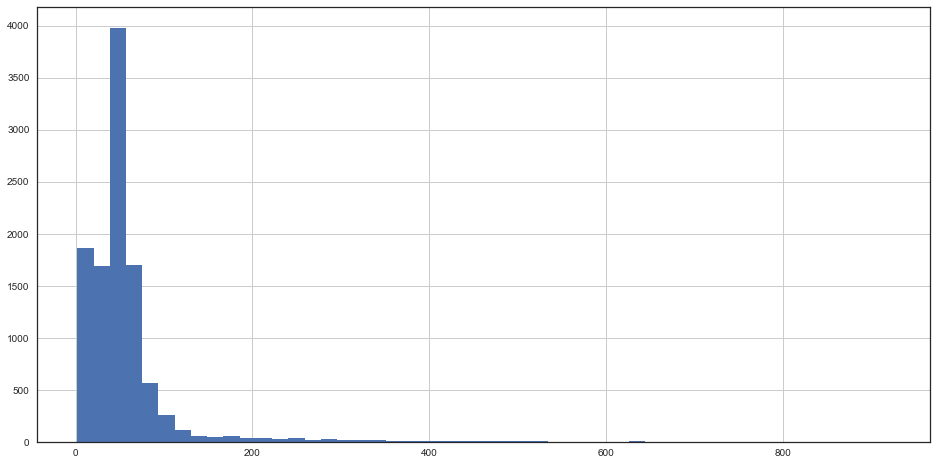

time: 214 ms


In [55]:
bloomfield.TravelTime.hist(figsize=(16, 8), bins=50)

Boxplot to check for outliers

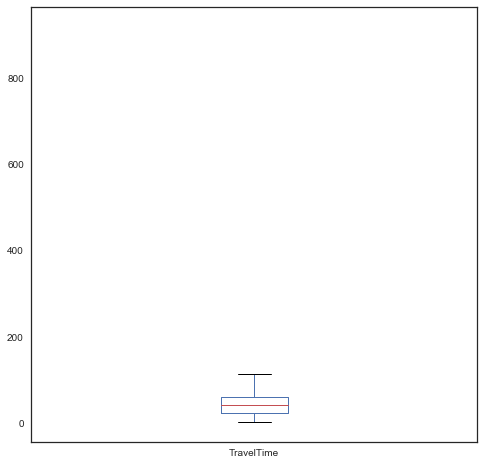

time: 167 ms


In [82]:
bloomfield.TravelTime.plot(kind='box', figsize=(8, 8), showfliers=True)

In [57]:
# checking how isolated top high-value outliers are in terms of time/date, and density of low-value outliers 

bloomfield.sort_values(['TravelTime', 'TimeFrame'], ascending=False, inplace=True)
bloomfield

,TravelTime,HourFrame,Day,SchoolHoliday,Rain,WindSpeed,TimeFrame,JourneyPatternID,VehicleJourneyID,SSID
1410,920,8,Wednesday,False,0.000000,6.5,2012-11-28,91001,3753,13481349
775,901,14,Friday,False,0.033325,5.0,2012-11-16,91001,4395,13481349
1417,840,8,Wednesday,False,0.000000,6.5,2012-11-28,91001,3767,13481349
8492,760,8,Thursday,False,0.000000,5.5,2012-11-29,161001,4960,13481349
10143,750,8,Thursday,False,0.000000,2.5,2013-01-24,161001,4811,13481349
76,689,8,Thursday,False,0.000000,5.5,2012-11-29,068A1001,1742,13481349
6461,680,8,Monday,False,0.100000,9.0,2013-01-07,681002,1694,13481349
10161,642,8,Thursday,False,0.000000,2.5,2013-01-24,161001,4889,13481349
9242,642,9,Friday,False,0.000000,5.0,2013-01-11,161001,4718,13481349
8445,637,8,Wednesday,False,0.000000,6.5,2012-11-28,161001,5068,13481349


time: 43 ms


Observation:  

## Weather features

(array([ 0.5,  1.5,  2.5]), <a list of 3 Text xticklabel objects>)

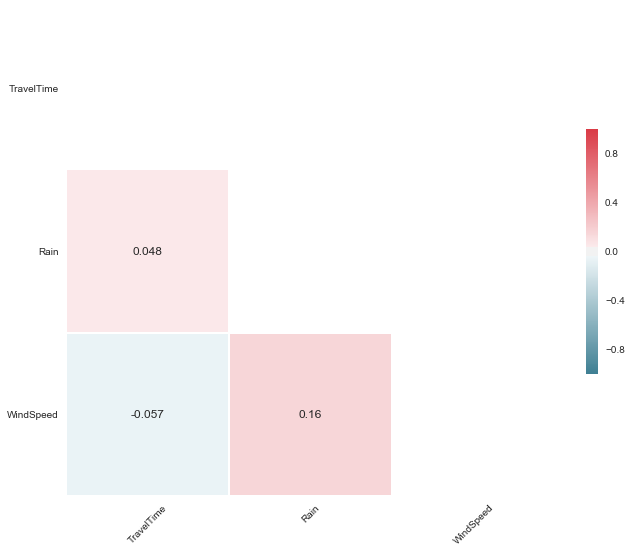

time: 191 ms


In [58]:
# checking correlations between weather and TravelTime

cont_columns = bloomfield[['TravelTime', 'Rain', 'WindSpeed']].columns

# Correlation matrix using code found on https://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html
sns.set(style="white")

# Calculate correlation of all pairs of continuous features
corr = bloomfield[cont_columns].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom colormap - blue and red
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.yticks(rotation = 0)
plt.xticks(rotation = 45)

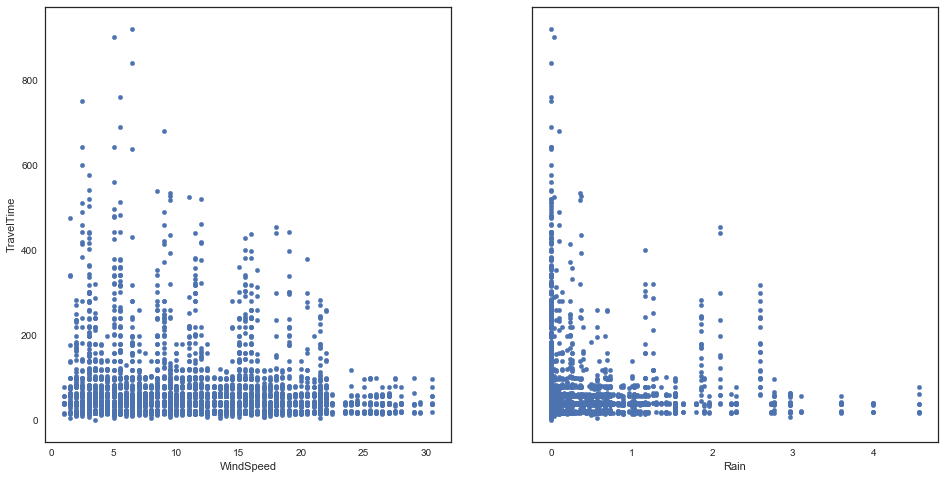

time: 472 ms


In [59]:
# scatterplots for the relationship between weather and TravelTime
fig, axs = plt.subplots(1, 2, sharey=True)
bloomfield.plot(kind='scatter', x='WindSpeed', y='TravelTime', ax=axs[0], figsize=(16, 8))
bloomfield.plot(kind='scatter', x='Rain', y='TravelTime', ax=axs[1])

Observation:  

## TravelTime and categorical features

In [60]:
# Checking stats for TravelTime so as to better understand the following graphs
# Create values for horizontal lines in the charts below to represent the mean/medium.

bloomfield_mean = bloomfield.TravelTime.mean()
bloomfield_median  = bloomfield.TravelTime.median()
bloomfield.TravelTime.describe()

count    10647.000000
mean        52.188222
std         55.776065
min          2.000000
25%         22.000000
50%         41.000000
75%         59.000000
max        920.000000
Name: TravelTime, dtype: float64

time: 9 ms


## JourneyPatternID strip plot

#### Note: In below charts, horizontal line is overall mean/median

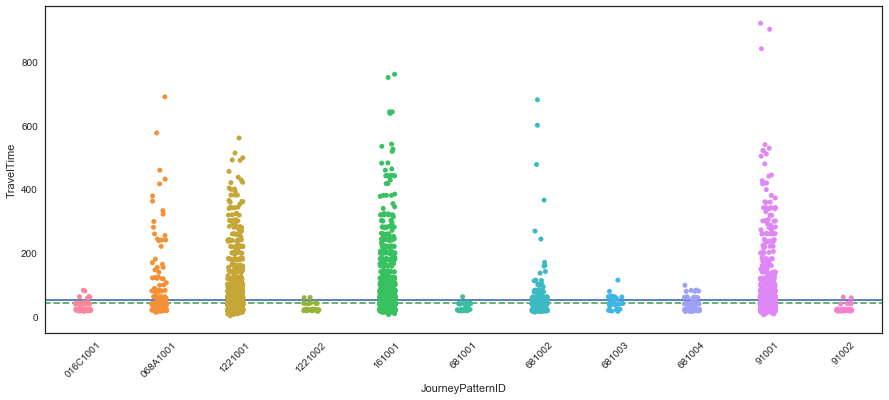

time: 398 ms


In [61]:
bloomfield.JourneyPatternID.cat.remove_unused_categories(inplace=True)
fig, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation=45)
sns.stripplot(x='JourneyPatternID', y="TravelTime", data=bloomfield, jitter=True);

coord_x1 = -1
coord_y1 = bloomfield_mean
coord_z1 = bloomfield_median
coord_x2 = 30


# mean full line, median dashed line
plt.plot([coord_x1, coord_x2], [coord_y1, coord_y1], '-o')
plt.plot([coord_x1, coord_x2], [coord_z1, coord_z1], '--')

Observation:  

### Bar plot for mean TravelTime per JourneyPatternID

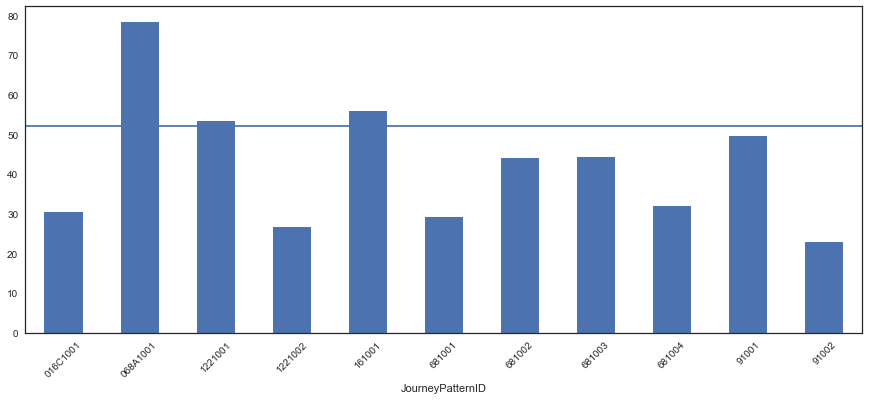

time: 219 ms


In [62]:
mean_JPID = bloomfield.groupby('JourneyPatternID')['TravelTime'].mean()
mean_JPID.plot(kind='bar', figsize=(15, 6), rot=45)

# code for line from https://stackoverflow.com/questions/38017465/how-to-add-a-line-on-top-of-a-bar-chart

coord_x1 = -1
coord_y1 = bloomfield_mean
coord_x2 = 30

plt.plot([coord_x1, coord_x2], [coord_y1, coord_y1], '-o')

Observation:  

### Bar plot for median TravelTime per JourneyPatternID

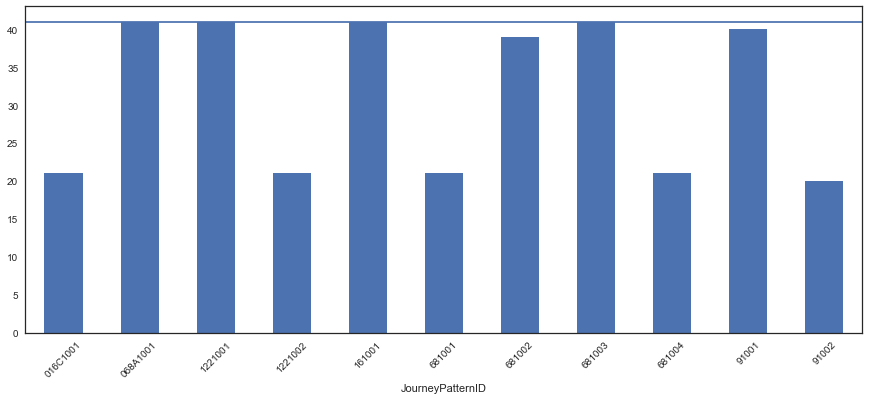

time: 159 ms


In [63]:
median_JPID = bloomfield.groupby('JourneyPatternID')['TravelTime'].median()
median_JPID.plot(kind='bar', figsize=(15, 6), rot=45)

coord_x1 = -1
coord_y1 = bloomfield_median
coord_x2 = 30

plt.plot([coord_x1, coord_x2], [coord_y1, coord_y1], '-o')

Observation:  Looks like the outliers are having a strong impact on the mean.  Almost half the buses (it seems like mostly alternative routes) have much lower values than others.

### Bar plot for mean TravelTime per HourFrame

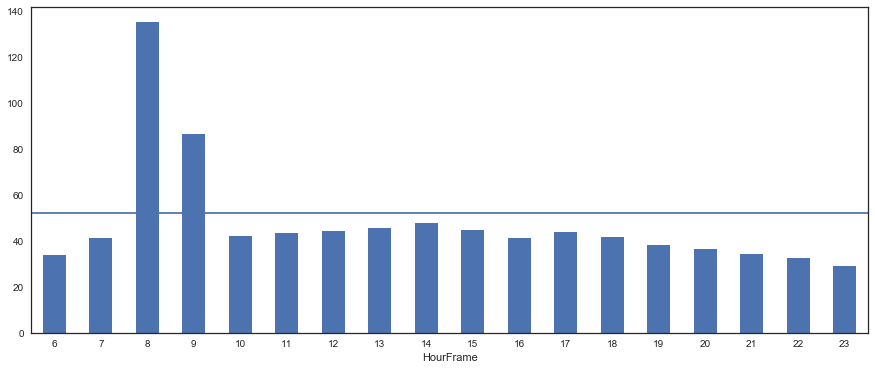

time: 174 ms


In [64]:
mean_HF = bloomfield.groupby('HourFrame')['TravelTime'].mean()
mean_HF.plot(kind='bar', figsize=(15, 6), rot=0)

coord_x1 = -1
coord_y1 = bloomfield_mean
coord_x2 = 25

plt.plot([coord_x1, coord_x2], [coord_y1, coord_y1], '-o')

Observation:  

### Bar plot for median TravelTime per HourFrame

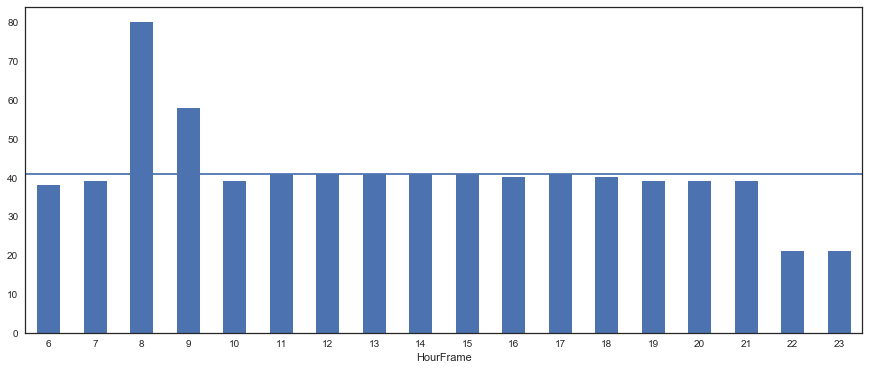

time: 176 ms


In [65]:
med_HF = bloomfield.groupby('HourFrame')['TravelTime'].median()
med_HF.plot(kind='bar', figsize=(15, 6), rot=0)

coord_x1 = -1
coord_y1 = bloomfield_median
coord_x2 = 25

plt.plot([coord_x1, coord_x2], [coord_y1, coord_y1], '-o')

Observation:  Very busy at morning rush hour, at median between then and after 10 pm

### Bar plot for mean TravelTime per Day

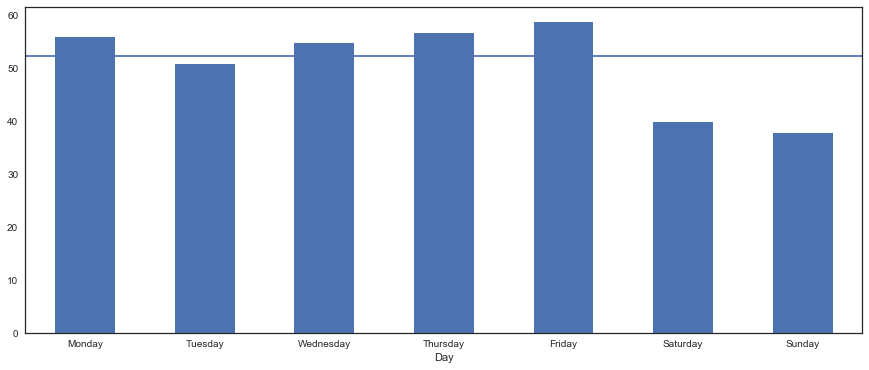

time: 143 ms


In [66]:
mean_Day = bloomfield.groupby('Day')['TravelTime'].mean()
mean_Day=mean_Day.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

mean_Day.plot(kind='bar', figsize=(15, 6), rot=0)

coord_x1 = -1
coord_y1 = bloomfield_mean

coord_x2 = 7

plt.plot([coord_x1, coord_x2], [coord_y1, coord_y1], '-o')

Observation:  

### Bar plot for median TravelTime per HourFrame

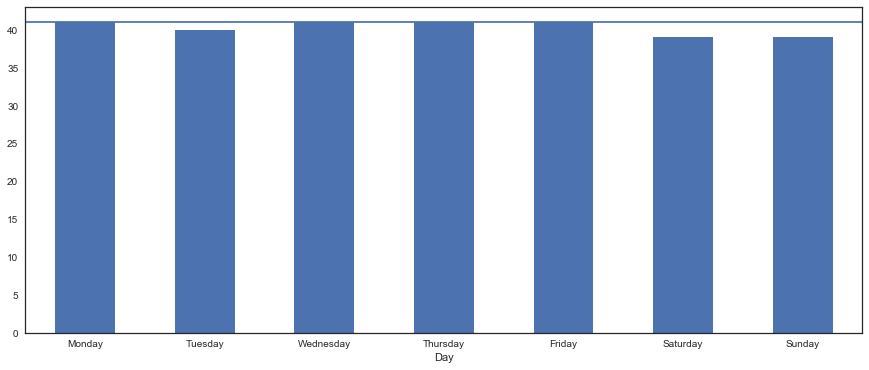

time: 153 ms


In [83]:
med_Day = bloomfield.groupby('Day')['TravelTime'].median()

med_Day=med_Day.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
med_Day.plot(kind='bar', figsize=(15, 6), rot=0)

coord_x1 = -1
coord_y1 = bloomfield_median
coord_x2 = 7

plt.plot([coord_x1, coord_x2], [coord_y1, coord_y1], '-o')

Observation:  A little quieter on weekends, but not much variation really.

### Bar plot for mean TravelTime when SchoolHoliday true/false

In [68]:
# check how many rows are true/false for SchoolHoliday
bloomfield.SchoolHoliday.describe().T

count     10647
unique        2
top       False
freq       7941
Name: SchoolHoliday, dtype: object

time: 5 ms


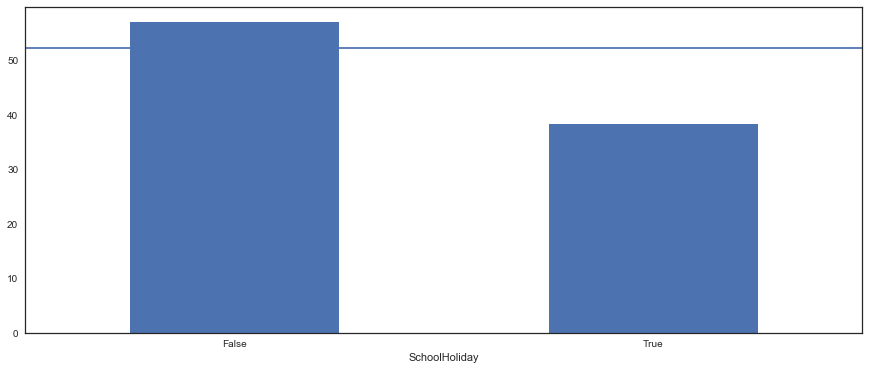

time: 125 ms


In [69]:
mean_SH = bloomfield.groupby('SchoolHoliday')['TravelTime'].mean()
mean_SH.plot(kind='bar', figsize=(15, 6), rot=0)

coord_x1 = -1
coord_y1 = bloomfield_mean
coord_x2 = 7

plt.plot([coord_x1, coord_x2], [coord_y1, coord_y1], '-o')

Observation:  

### Bar plot for median TravelTime when SchoolHoliday true/false

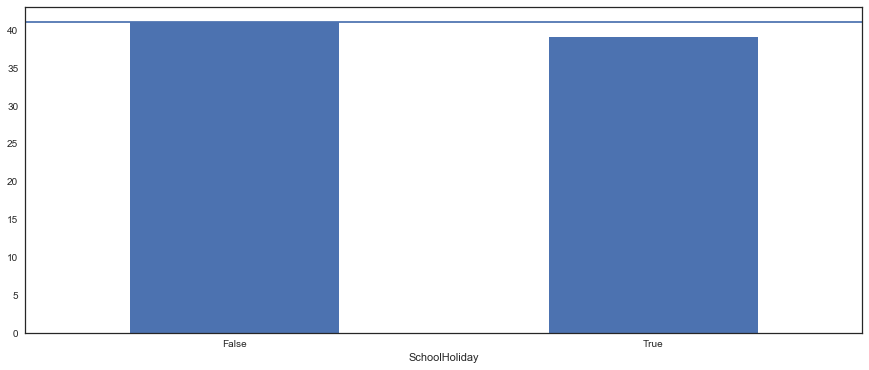

time: 129 ms


In [70]:
med_SH = bloomfield.groupby('SchoolHoliday')['TravelTime'].median()
med_SH.plot(kind='bar', figsize=(15, 6), rot=0)

coord_x1 = -1
coord_y1 = bloomfield_median
coord_x2 = 7

plt.plot([coord_x1, coord_x2], [coord_y1, coord_y1], '-o')

Observation:  

## Looking at dropping outliers

In [72]:
# make a copy of original df
trimbloomfield = bloomfield.copy()

# Remove TravelTime outliers beyond a conservative 3 x IQR
# Code adapted from here: http://nbviewer.jupyter.org/urls/bitbucket.org/hrojas/learn-pandas/raw/master/lessons/07%20-%20Lesson.ipynb
# Also got some help here: https://www.reddit.com/r/learnpython/comments/65sz8g/trying_to_get_highlight_outliers_in_a_dataframe/
# Functions first defined for calculating upper and lower bounds.
lowerOp = trimbloomfield.quantile(q=.25) - (3*(trimbloomfield.quantile(q=.75)-trimbloomfield.quantile(q=.25)))
upperOp = trimbloomfield.quantile(q=.75) + (3*(trimbloomfield.quantile(q=.75)-trimbloomfield.quantile(q=.25)))

# New boolean column created where values beyond the bounds for 'TravelTime' are tagged as True.
trimbloomfield['OutlierTT'] = (trimbloomfield['TravelTime'] < lowerOp['TravelTime']) | (trimbloomfield['TravelTime'] > upperOp['TravelTime'])

# Outlier rows counted
print("There would be", trimbloomfield[(trimbloomfield['OutlierTT'] == True)].shape[0], "outliers dropped.")

There would be 354 outliers dropped.
time: 21 ms


In [73]:
trimbloomfield = trimbloomfield[trimbloomfield.OutlierTT != True]
trimbloomfield.sort_values(['TravelTime'], ascending=False, inplace=True)

time: 71 ms


In [74]:
trimbloomfield

,TravelTime,HourFrame,Day,SchoolHoliday,Rain,WindSpeed,TimeFrame,JourneyPatternID,VehicleJourneyID,SSID,XBuses,OutlierTT
2925,170,8,Friday,False,0.233276,9.0,2013-01-25,91001,3629,13481349,0,False
2272,170,11,Monday,False,0.000000,12.0,2013-01-14,91001,3617,13481349,0,False
6528,170,8,Monday,False,0.000000,11.0,2013-01-14,681002,1694,13481349,0,False
10147,170,9,Thursday,False,0.000000,2.0,2013-01-24,161001,4820,13481349,0,False
9965,169,9,Tuesday,False,0.000000,3.0,2013-01-22,161001,4729,13481349,0,False
40,169,8,Monday,False,0.000000,20.5,2012-11-19,068A1001,1704,13481349,0,False
5635,167,8,Tuesday,False,0.000000,2.0,2013-01-22,1221001,1356,13481349,0,False
9612,166,8,Wednesday,False,0.000000,5.5,2013-01-16,161001,4820,13481349,0,False
9174,166,11,Thursday,False,0.200000,5.5,2013-01-10,161001,4724,13481349,0,False
2739,164,8,Tuesday,False,0.000000,2.0,2013-01-22,91001,3629,13481349,0,False


time: 41 ms


NOTE - Outliers not removed.

Observation:  Probably need to drop some here, but also need to to removed outliers 

### Linear Regression model

In [84]:
# Train/fit a model using all features to start with.
# Some modifications to the data first

# dropping SSID and TimeFrame as these have no predictive value here
LRbloomfield = bloomfield.drop(['SSID', 'TimeFrame'], axis=1)

# Convert binary categorical SchoolHoliday column to numerical.
LRbloomfield['SchoolHoliday'] = LRbloomfield['SchoolHoliday'].astype('int')

time: 4 ms


In [85]:
# preliminary training to see which variables are worth selecting
lrle = sm.ols(formula="TravelTime ~  SchoolHoliday + WindSpeed + Rain + C(JourneyPatternID)+ C(HourFrame) + C(Day)", data=LRbloomfield).fit()

time: 97 ms


In [86]:
print(lrle.summary())

                            OLS Regression Results                            
Dep. Variable:             TravelTime   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     103.7
Date:                Mon, 31 Jul 2017   Prob (F-statistic):               0.00
Time:                        00:31:08   Log-Likelihood:                -56317.
No. Observations:               10647   AIC:                         1.127e+05
Df Residuals:                   10610   BIC:                         1.130e+05
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

Observation:  Only JPID 68A has a p-value that passes.  Several hour- and day-frames' p-values are above 0.05 too, but we'll leave them in for the next step.

In [87]:
rsqa = stm.regression.linear_model.RegressionResults.rsquared_adj(lrle) 

print ("Many JourneyPatternIDs have p-values too high (over 0.05), so they will be cut next.")
print ("The R-squared value of", rsqa, "means that Linear Regression is unlikely to be useful in the long run though.")
#ols(y=rets['AAPL'], x=rets.ix[:, ['GOOG']]).rsquared

Many JourneyPatternIDs have p-values too high (over 0.05), so they will be cut next.
The R-squared value of 0.257748825045 means that Linear Regression is unlikely to be useful in the long run though.
time: 2 ms


In [88]:
# Train/fit a model using features with p-value under 0.05

# create dummy variables from HourFrame, Day, JourneyPatternID using get_dummies
# code adapted from: https://github.com/justmarkham/DAT4/blob/master/notebooks/08_linear_regression.ipynb
HF_dummies = pd.get_dummies(LRbloomfield.HourFrame, prefix='HF')
Day_dummies = pd.get_dummies(LRbloomfield.Day, prefix='Day')
JPID_dummies = pd.get_dummies(LRbloomfield.JourneyPatternID, prefix='JPID')

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
LRbloomfield = pd.concat([LRbloomfield, HF_dummies, Day_dummies, JPID_dummies], axis=1)

time: 9 ms


In [89]:
print(LRbloomfield.columns.values.tolist())

['TravelTime', 'HourFrame', 'Day', 'SchoolHoliday', 'Rain', 'WindSpeed', 'JourneyPatternID', 'VehicleJourneyID', 'XBuses', 'HF_6', 'HF_7', 'HF_8', 'HF_9', 'HF_10', 'HF_11', 'HF_12', 'HF_13', 'HF_14', 'HF_15', 'HF_16', 'HF_17', 'HF_18', 'HF_19', 'HF_20', 'HF_21', 'HF_22', 'HF_23', 'Day_Friday', 'Day_Monday', 'Day_Saturday', 'Day_Sunday', 'Day_Thursday', 'Day_Tuesday', 'Day_Wednesday', 'JPID_016C1001', 'JPID_068A1001', 'JPID_1221001', 'JPID_1221002', 'JPID_161001', 'JPID_681001', 'JPID_681002', 'JPID_681003', 'JPID_681004', 'JPID_91001', 'JPID_91002']
time: 1e+03 µs


In [90]:
# remove any features with p-values under 0.05 

LRbloomfield = LRbloomfield.drop(['XBuses', 'JPID_016C1001', 'JPID_1221001', 'JPID_1221002', 'JPID_161001'], axis = 1)
LRbloomfield = LRbloomfield.drop(['JPID_681001', 'JPID_681002', 'JPID_681003', 'JPID_681004', 'JPID_91001', 'JPID_91002'], axis = 1)

time: 6 ms


In [91]:
LRbloomfield.shape

(10647, 34)

time: 2 ms


In [92]:
print(LRbloomfield.columns.values.tolist())

['TravelTime', 'HourFrame', 'Day', 'SchoolHoliday', 'Rain', 'WindSpeed', 'JourneyPatternID', 'VehicleJourneyID', 'HF_6', 'HF_7', 'HF_8', 'HF_9', 'HF_10', 'HF_11', 'HF_12', 'HF_13', 'HF_14', 'HF_15', 'HF_16', 'HF_17', 'HF_18', 'HF_19', 'HF_20', 'HF_21', 'HF_22', 'HF_23', 'Day_Friday', 'Day_Monday', 'Day_Saturday', 'Day_Sunday', 'Day_Thursday', 'Day_Tuesday', 'Day_Wednesday', 'JPID_068A1001']
time: 4 ms


In [93]:
LRbloomfield.head(25)

,TravelTime,HourFrame,Day,SchoolHoliday,Rain,WindSpeed,JourneyPatternID,VehicleJourneyID,HF_6,HF_7,...,HF_22,HF_23,Day_Friday,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday,JPID_068A1001
1410,920,8,Wednesday,0,0.000000,6.5,91001,3753,0,0,...,0,0,0,0,0,0,0,0,1,0
775,901,14,Friday,0,0.033325,5.0,91001,4395,0,0,...,0,0,1,0,0,0,0,0,0,0
1417,840,8,Wednesday,0,0.000000,6.5,91001,3767,0,0,...,0,0,0,0,0,0,0,0,1,0
8492,760,8,Thursday,0,0.000000,5.5,161001,4960,0,0,...,0,0,0,0,0,0,1,0,0,0
10143,750,8,Thursday,0,0.000000,2.5,161001,4811,0,0,...,0,0,0,0,0,0,1,0,0,0
76,689,8,Thursday,0,0.000000,5.5,068A1001,1742,0,0,...,0,0,0,0,0,0,1,0,0,1
6461,680,8,Monday,0,0.100000,9.0,681002,1694,0,0,...,0,0,0,1,0,0,0,0,0,0
10161,642,8,Thursday,0,0.000000,2.5,161001,4889,0,0,...,0,0,0,0,0,0,1,0,0,0
9242,642,9,Friday,0,0.000000,5.0,161001,4718,0,0,...,0,0,1,0,0,0,0,0,0,0
8445,637,8,Wednesday,0,0.000000,6.5,161001,5068,0,0,...,0,0,0,0,0,0,0,0,1,0


time: 32 ms


In [95]:
lrle1 = sm.ols(formula="TravelTime ~  JPID_068A1001 + SchoolHoliday + WindSpeed + Rain + HF_6 + HF_7 + HF_8 + HF_9 + HF_10 + HF_11 + HF_12 + HF_13 + HF_14 + HF_15 + HF_16 + HF_17 + HF_18 + HF_19 + HF_20 + HF_21 + HF_22 + HF_23 + Day_Friday + Day_Monday + Day_Saturday + Day_Sunday + Day_Thursday + Day_Tuesday + Day_Wednesday", data=LRbloomfield).fit()

time: 75 ms


In [96]:
print(lrle1.summary())

                            OLS Regression Results                            
Dep. Variable:             TravelTime   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     137.0
Date:                Mon, 31 Jul 2017   Prob (F-statistic):               0.00
Time:                        00:33:50   Log-Likelihood:                -56331.
No. Observations:               10647   AIC:                         1.127e+05
Df Residuals:                   10619   BIC:                         1.129e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        47.0248      0.995     47.261

Observation:  The hour frame p-values have kind of reversed themselves!  Not sure why that happened (though the new scores make more sense as those with high p-values deviate more from the overall median score).  So besides weather, only one route, the day features and non-median value hour features have significant predictive value.